### Importación de datos



In [4]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


#1. Análisis de facturación



In [5]:
ingreso_total_tienda1 = tienda['Precio'].sum()

In [6]:
print(f"El ingreso total de la Tienda 1 es: {ingreso_total_tienda1}")

El ingreso total de la Tienda 1 es: 1150880400.0


In [7]:
datos_ingresos = tiendas.groupby('Tienda').agg(
    Ingreso_Total=('Precio', 'sum'),
).reset_index()
datos_ingresos

,Tienda,Ingreso_Total
0,Tienda 1,1150880400.00
1,Tienda 2,1116343500.00
2,Tienda 3,1098019600.00
3,Tienda 4,1038375700.00


# 2. Ventas por categoría

In [8]:
ventas_por_tienda = tiendas.groupby(['Tienda', 'Categoría del Producto']).agg(
    Unidades_Vendidas=('Producto', 'size'),
    Ingreso_Total=('Precio', 'sum')
).reset_index()
ventas_por_tienda

,Tienda,Categoría del Producto,Unidades_Vendidas,Ingreso_Total
0,Tienda 1,Artículos para el hogar,171,12698400.00
1,Tienda 1,Deportes y diversión,284,39290000.00
2,Tienda 1,Electrodomésticos,312,363685200.00
3,Tienda 1,Electrónicos,448,429493500.00
4,Tienda 1,Instrumentos musicales,182,91299000.00
5,Tienda 1,Juguetes,324,17995700.00
6,Tienda 1,Libros,173,8784900.00
7,Tienda 1,Muebles,465,187633700.00
8,Tienda 2,Artículos para el hogar,181,14746900.00
9,Tienda 2,Deportes y diversión,275,34744500.00


# 3. Calificación promedio de la tienda


In [9]:
resumen_satisfaccion = tiendas.groupby('Tienda').agg(Calificación_Promedio=('Calificación', 'mean')).reset_index()
resumen_satisfaccion

,Tienda,Calificación_Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

Los productos **más vendidos** de la tienda 1 son:


In [10]:
top_productos1 = tienda.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
top_productos1 = top_productos1.sort_values(by='Precio', ascending=False).head().reset_index(drop=True)
top_productos1

,Producto,Categoría del Producto,Cantidad,Precio
0,TV LED UHD 4K,Electrónicos,60,142150200.00
1,Refrigerador,Electrodomésticos,54,112143300.00
2,Iphone 15,Electrónicos,49,97902200.00
3,Smart TV,Electrónicos,44,67452100.00
4,Lavadora de ropa,Electrodomésticos,47,65783600.00


Los productos **menos vendidos** de la tienda 1 son:

In [11]:
bottom_productos1 = tienda.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
bottom_productos1 = bottom_productos1.sort_values(by='Precio', ascending=False).tail().reset_index(drop=True)
bottom_productos1

,Producto,Categoría del Producto,Cantidad,Precio
0,Ajedrez de madera,Juguetes,49,1430600.00
1,Set de vasos,Artículos para el hogar,41,1359100.00
2,Cubo mágico 8x8,Juguetes,44,696900.00
3,Dinosaurio Rex,Juguetes,40,688900.00
4,Cuerda para saltar,Deportes y diversión,40,652800.00




---



Los productos **más vendidos:** de la tienda 2 son:


In [12]:
top_productos2 = tienda2.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
top_productos2 = top_productos2.sort_values(by='Precio', ascending=False).head().reset_index(drop=True)
top_productos2

,Producto,Categoría del Producto,Cantidad,Precio
0,Iphone 15,Electrónicos,55,113225800.00
1,TV LED UHD 4K,Electrónicos,45,103375000.00
2,Refrigerador,Electrodomésticos,49,97632500.00
3,Lavadora de ropa,Electrodomésticos,49,66762300.00
4,Smart TV,Electrónicos,40,61142000.00


Los productos **menos vendidos** de la tienda 2 son:

In [13]:
bottom_productos2 = tienda2.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
bottom_productos2 = bottom_productos2.sort_values(by='Precio', ascending=False).tail().reset_index(drop=True)
bottom_productos2

,Producto,Categoría del Producto,Cantidad,Precio
0,Set de vasos,Artículos para el hogar,46,1542600.00
1,Ajedrez de madera,Juguetes,45,1287700.00
2,Cuerda para saltar,Deportes y diversión,50,856900.00
3,Dinosaurio Rex,Juguetes,42,770300.00
4,Cubo mágico 8x8,Juguetes,45,643600.00




---



Los productos **más vendidos:** de la tienda 3 son:

In [14]:
top_productos3 = tienda3.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
top_productos3 = top_productos3.sort_values(by='Precio', ascending=False).head().reset_index(drop=True)
top_productos3

,Producto,Categoría del Producto,Cantidad,Precio
0,Refrigerador,Electrodomésticos,50,99889700.00
1,TV LED UHD 4K,Electrónicos,42,96669100.00
2,Iphone 15,Electrónicos,46,93225700.00
3,Smart TV,Electrónicos,54,78837300.00
4,Lavavajillas,Electrodomésticos,52,64364800.00


Los productos **menos vendidos** de la tienda 3 son:

In [15]:
bottom_productos3 = tienda3.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
bottom_productos3 = bottom_productos3.sort_values(by='Precio', ascending=False).tail().reset_index(drop=True)
bottom_productos3

,Producto,Categoría del Producto,Cantidad,Precio
0,Bloques de construcción,Juguetes,35,1237200.00
1,Set de vasos,Artículos para el hogar,36,1210700.00
2,Cuerda para saltar,Deportes y diversión,53,853800.00
3,Dinosaurio Rex,Juguetes,46,795600.00
4,Cubo mágico 8x8,Juguetes,44,640400.00




---



Los productos **más vendidos:** de la tienda 4 son:

In [16]:
top_productos4 = tienda4.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
top_productos4 = top_productos4.sort_values(by='Precio', ascending=False).head().reset_index(drop=True)
top_productos4

,Producto,Categoría del Producto,Cantidad,Precio
0,Iphone 15,Electrónicos,48,96697500.00
1,TV LED UHD 4K,Electrónicos,40,90295300.00
2,Smart TV,Electrónicos,54,82790400.00
3,Refrigerador,Electrodomésticos,38,75271900.00
4,Tablet ABXY,Electrónicos,45,56723100.00




---



Los productos **menos vendidos:** de la tienda 4 son:

In [17]:
bottom_productos4 = tienda4.groupby(['Producto', 'Categoría del Producto']).agg(Cantidad=('Producto', 'size'), Precio=('Precio', 'sum')).reset_index()
bottom_productos4 = bottom_productos4.sort_values(by='Precio', ascending=False).tail().reset_index(drop=True)
bottom_productos4

,Producto,Categoría del Producto,Cantidad,Precio
0,Set de vasos,Artículos para el hogar,46,1471800.00
1,Ajedrez de madera,Juguetes,39,1075500.00
2,Dinosaurio Rex,Juguetes,47,858100.00
3,Cubo mágico 8x8,Juguetes,47,748400.00
4,Cuerda para saltar,Deportes y diversión,43,704800.00


# 5. Envío promedio por tienda

In [45]:
resumen_envio = tiendas.groupby('Tienda').agg(
    Costo_de_envío_promedio=('Costo de envío', 'mean')
).reset_index()
resumen_envio


,Tienda,Costo_de_envío_promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


# Graficos


In [19]:
import matplotlib.pyplot as plt

Graficos de barras comparativo entre las 4 tiendas

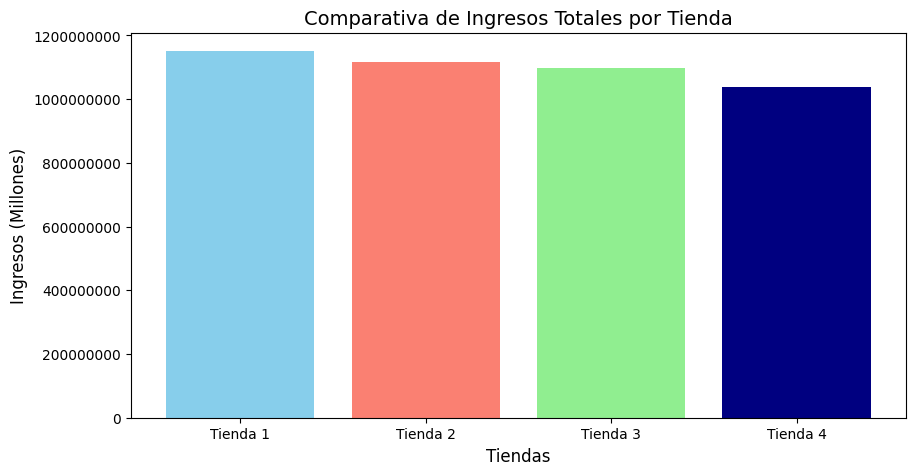

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(datos_ingresos['Tienda'], datos_ingresos['Ingreso_Total'], color=['skyblue', 'salmon', 'lightgreen', 'navy'])

plt.title('Comparativa de Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos (Millones)', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')


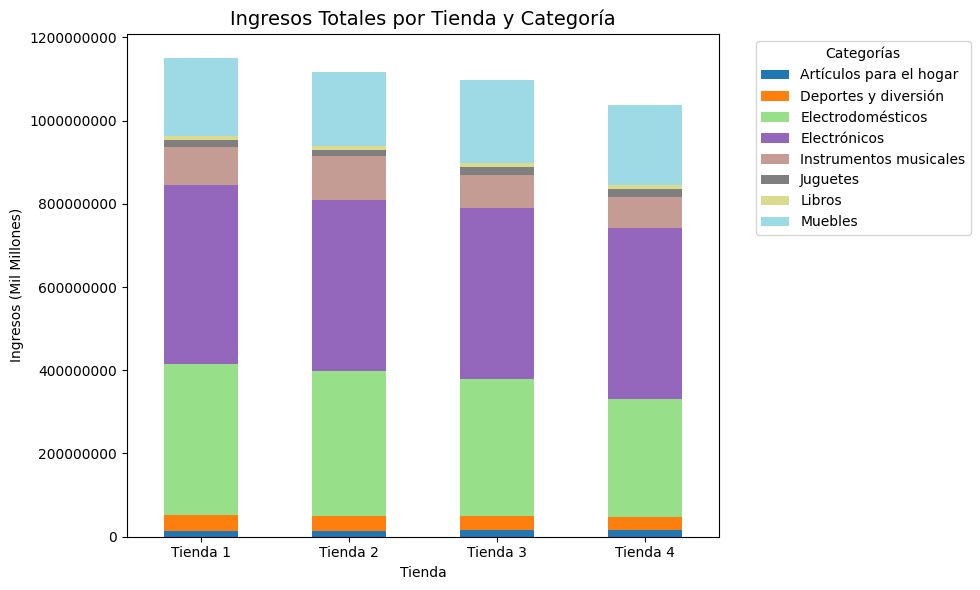

In [27]:

df_pivot = ventas_por_tienda.pivot(index='Tienda', columns='Categoría del Producto', values='Ingreso_Total')


df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.ticklabel_format(style='plain', axis='y')

plt.title('Ingresos Totales por Tienda y Categoría', fontsize=14)
plt.ylabel('Ingresos (Mil Millones)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Gráfico de calificacíon entre las 4 tiendas

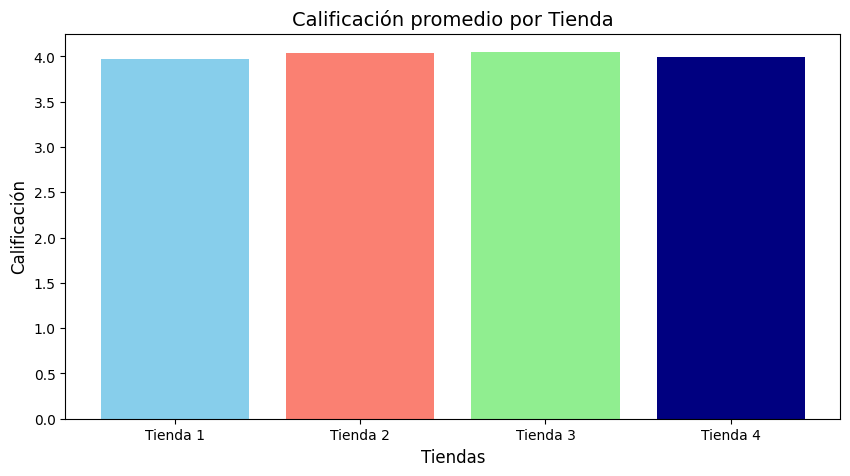

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(resumen_satisfaccion['Tienda'], resumen_satisfaccion['Calificación_Promedio'], color=['skyblue', 'salmon', 'lightgreen', 'navy'])

plt.title('Calificación promedio por Tienda', fontsize=14)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Calificación', fontsize=12)


plt.ticklabel_format(style='plain', axis='y')

Gráfico de dispersión de cuanto paga el cliente por envio según el producto

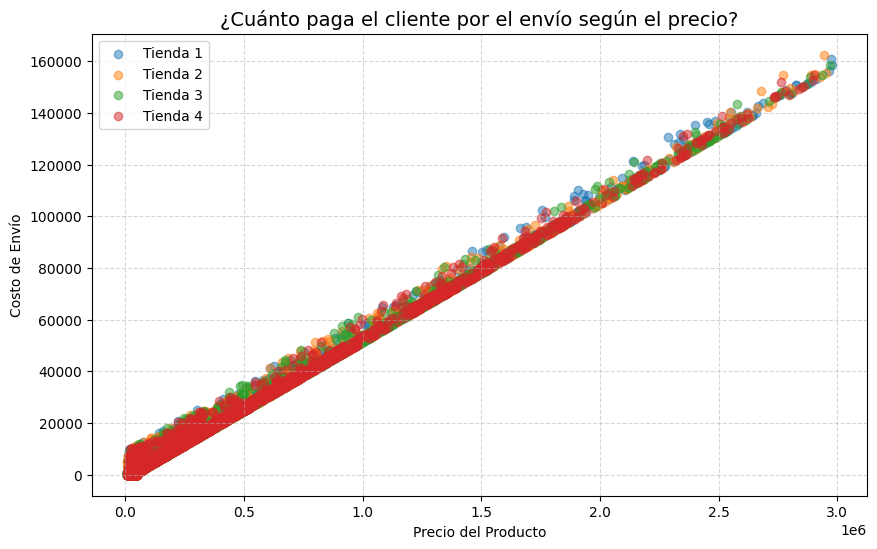

In [41]:
plt.figure(figsize=(10, 6))

for nombre_tienda, datos in tiendas.groupby('Tienda'):
    plt.scatter(datos['Precio'], datos['Costo de envío'], label=nombre_tienda, alpha=0.5)

plt.ticklabel_format(style='plain', axis='y')
plt.title('¿Cuánto paga el cliente por el envío según el precio?', fontsize=14)
plt.xlabel('Precio del Producto')
plt.ylabel('Costo de Envío')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Gráfico de porcentaje de ingresos que aporta cada tienda

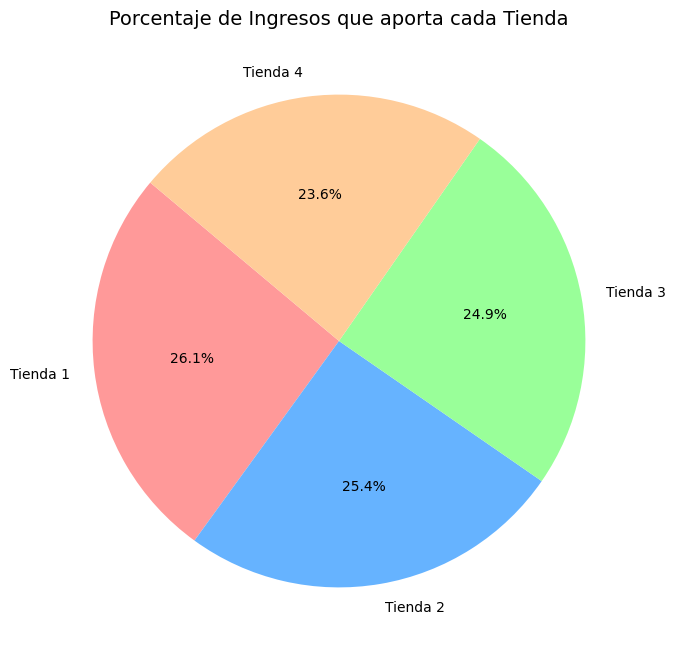

In [33]:

ingresos_globales = ventas_por_tienda.groupby('Tienda')['Ingreso_Total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ingresos_globales,
        labels=ingresos_globales.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
)

plt.title('Porcentaje de Ingresos que aporta cada Tienda', fontsize=14)
plt.show()

Graífco de lugares con mayor ventas de todas las tiendas

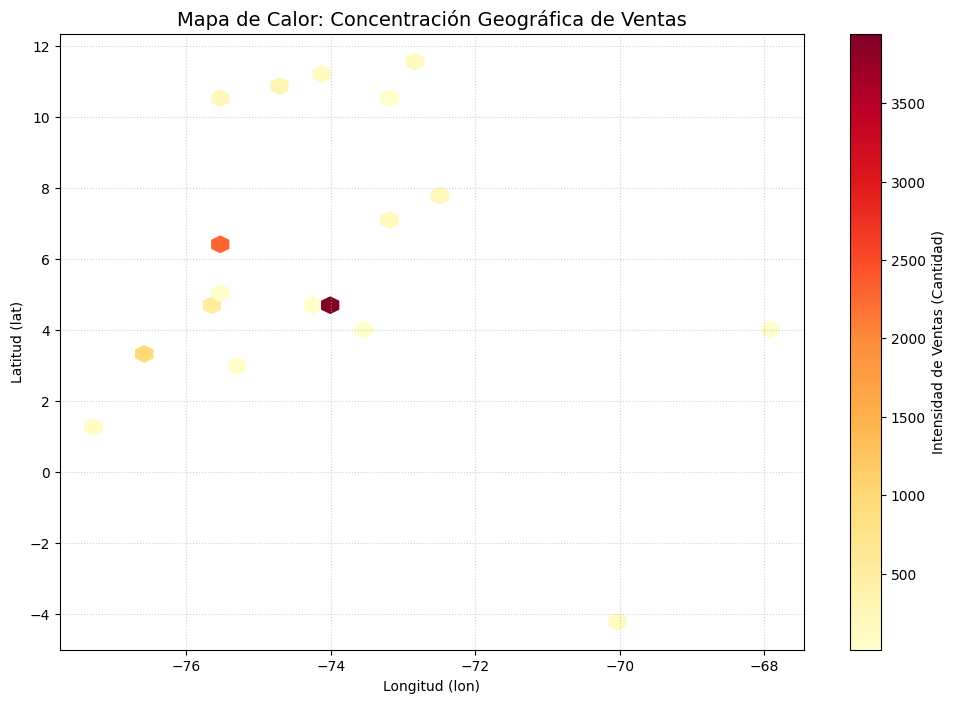

In [65]:

plt.figure(figsize=(12, 8))

hb = plt.hexbin(tiendas['lon'], tiendas['lat'], gridsize=40, cmap='YlOrRd', mincnt=1)

cb = plt.colorbar(hb)
cb.set_label('Intensidad de Ventas (Cantidad)')

plt.title('Mapa de Calor: Concentración Geográfica de Ventas', fontsize=14)
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

Gráfico donde se muestra las ciudades donde **hay más ventas para la tienda 4**

Coordenadas de los puntos más rojos:
    lat    lon Lugar de Compra  Conteo
8  4.61 -74.08          Bogotá     991
11 6.25 -75.56        Medellín     577
3  3.44 -76.52            Cali     254


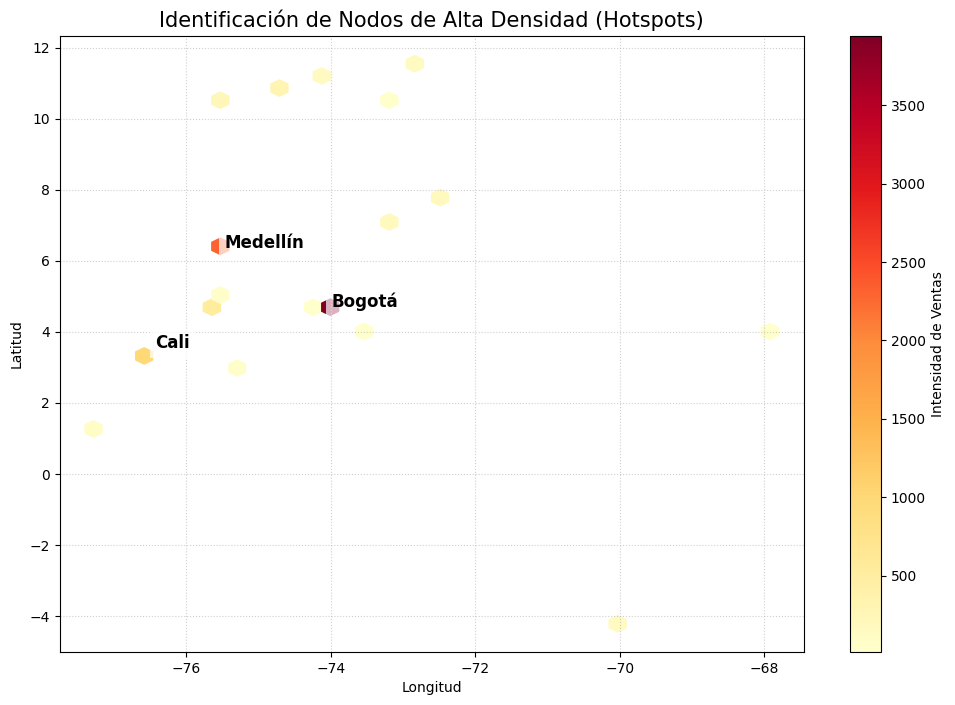

In [67]:

top_ubicaciones = tienda4.groupby(['lat', 'lon', 'Lugar de Compra']).size().reset_index(name='Conteo')

hotspots = top_ubicaciones.sort_values(by='Conteo', ascending=False).head(3)

print("Coordenadas de los puntos más rojos:")
print(hotspots)

plt.figure(figsize=(12, 8))

hb = plt.hexbin(tiendas['lon'], tiendas['lat'], gridsize=40, cmap='YlOrRd', mincnt=1)
plt.colorbar(hb, label='Intensidad de Ventas')

for i, row in hotspots.iterrows():
    plt.text(row['lon'] + 0.1, row['lat'] + 0.1, row['Lugar de Compra'],
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Identificación de Nodos de Alta Densidad (Hotspots)', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

Gráfico donde se muestra las ciudades donde **hay más ventas para la tienda 1**

Coordenadas de los puntos más rojos:
    lat    lon Lugar de Compra  Conteo
8  4.61 -74.08          Bogotá     985
11 6.25 -75.56        Medellín     594
3  3.44 -76.52            Cali     222


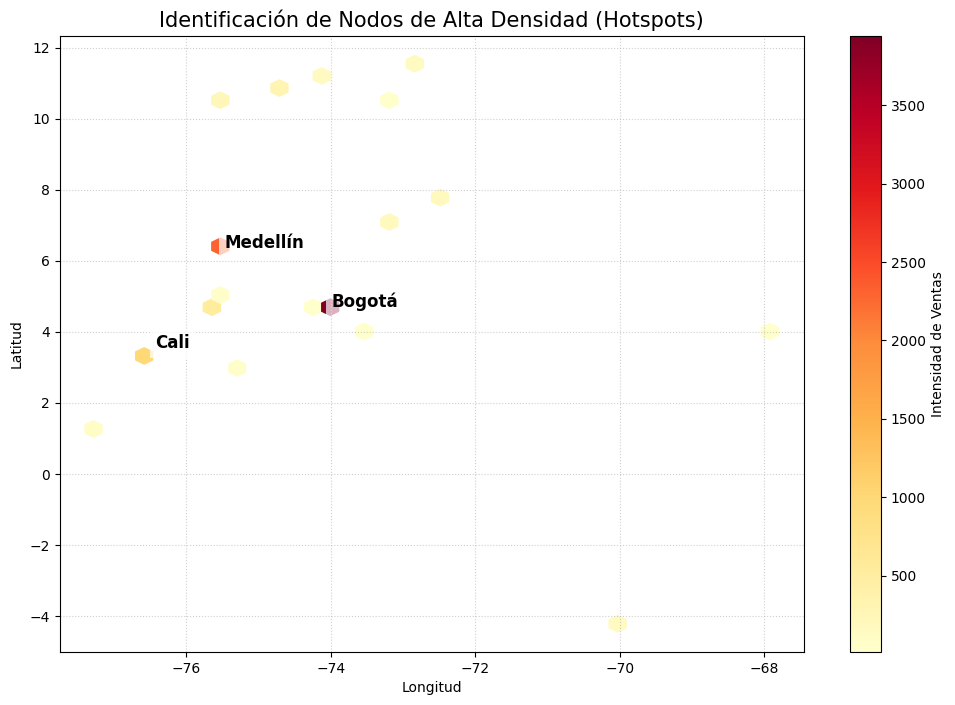

In [68]:

top_ubicaciones = tienda2.groupby(['lat', 'lon', 'Lugar de Compra']).size().reset_index(name='Conteo')

hotspots = top_ubicaciones.sort_values(by='Conteo', ascending=False).head(3)

print("Coordenadas de los puntos más rojos:")
print(hotspots)

plt.figure(figsize=(12, 8))

hb = plt.hexbin(tiendas['lon'], tiendas['lat'], gridsize=40, cmap='YlOrRd', mincnt=1)
plt.colorbar(hb, label='Intensidad de Ventas')

for i, row in hotspots.iterrows():
    plt.text(row['lon'] + 0.1, row['lat'] + 0.1, row['Lugar de Compra'],
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Identificación de Nodos de Alta Densidad (Hotspots)', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Informe Final

Informe de Análisis de Desempeño: Alura Store Latam

Introducción


Este análisis se realizó con el objetivo de asesorar al Sr. Juan sobre la venta de una de sus cuatro tiendas. Para tomar esta decisión, he procesado y consolidado las bases de datos de cada sucursal, evaluando métricas críticas como el flujo de ingresos, la aceptación del cliente mediante calificaciones y los costos de envío. El propósito es identificar la unidad que presenta el rendimiento más bajo y que, por lo tanto, compromete la rentabilidad de la cadena.


Análisis de los Datos



Al revisar los ingresos totales, se observa que la Tienda 1 es la más robusta financieramente, alcanzando aproximadamente 1,150 millones, mientras que la Tienda 4 se queda atrás como la menos productiva con 1,038 millones. Esta diferencia se evidencia en el gráfico circular, donde la participación de la Tienda 4 es la que menos aporta al ecosistema de Alura Store.

En cuanto a las categorías, la debilidad de la Tienda 4 se hace evidente al analizar el gráfico de barras apiladas. Mientras que las tiendas líderes tienen un volumen fuerte en productos de alto valor como Electrónicos y Muebles, la Tienda 4 muestra una dependencia de categorías con menor margen. Además, al observar los productos menos vendidos (bottom productos), la Tienda 4 tiene una rotación muy lenta en artículos que en otras sucursales sí fluyen, lo que indica un inventario poco eficiente.

La satisfacción del cliente también arroja datos preocupantes para la Tienda 4. Al calcular el promedio de calificaciones, esta sucursal obtuvo la puntuación más baja de la cadena. Esto sugiere una desconexión con el cliente o fallas en la calidad del servicio que impactan directamente en la reputación de la marca.

Asimismo, al analizar el costo de envío. Aunque los datos muestran que la Tienda 4 tiene el costo de envío promedio más bajo ($23,459), el gráfico de dispersión confirma que esto se debe a que vende principalmente productos económicos. La línea diagonal perfecta indica que a menor precio del producto, menor es el envío. Sin embargo, tener el envío más bajo no es una ventaja si la facturación total es mínima. Lo preocupante es que, a pesar de ofrecer estos precios y envíos bajos, la Tienda 4 posee la calificación promedio más baja de la cadena, lo que evidencia que el cliente no está satisfecho con la calidad del servicio o del producto recibido.

Finalmente, mediante la implementación de un Mapa de Calor (Heatmap) y la identificación de nodos de alta densidad (Hotspots), se determinó que el mercado está concentrado en 3 ciudades principales. Lo más relevante para este análisis es que todas las tiendas operan en los mismos nodos de demanda. Al ser la ubicación una constante para todas las sucursales, se concluye que la baja facturación de la Tienda 4 no se debe a su posición geográfica, sino a una falla en su competitividad interna. A pesar de tener acceso a los mismos centros de alta demanda que la Tienda 1, la Tienda 4 no logra convertir ese tráfico en ventas de alto valor.

Conclusión y Recomendación Técnica


La recomendación técnica es proceder con la venta de la Tienda 4. Los datos procesados confirman que es la unidad con el rendimiento más bajo, generando solo 1,038 millones en ingresos frente a los 1,150 millones de la Tienda 1. A pesar de registrar el costo de envío promedio más reducido, este factor no se traduce en rentabilidad, sino que refleja un volumen de ventas concentrado en artículos de bajo valor unitario que estancan el margen de ganancia global.

Además del bajo desempeño financiero, la Tienda 4 presenta la calificación de satisfacción más deficiente, lo que indica fallas operativas o de calidad que comprometen la reputación de la marca. Dado que el análisis geoespacial demuestra que la tienda compite en los mismos mercados que las sucursales más exitosas sin lograr resultados similares, mantenerla operativa genera un costo de oportunidad elevado. La venta de este activo es la decisión más lógica para optimizar el flujo de caja y permitir que el capital se reinvierta en el escalamiento de la Tienda 1.